# IBM MACHINE LEARNING - PROJECT B 

## Mosquito Indicator in Seoul, Korea - Regression Analysis

In [1]:
# Import the necessary libraries for cleaning
import numpy as np # For linear algebra
import pandas as pd # For data frame manipulation
import seaborn as sns # For visualization I
import matplotlib.pyplot as plt # For visualization II
%matplotlib inline 

**Tha main objective of this analysis is to predict mosquitoes infestation, and to interpret the main attributes that lead to it. According to WHO, mosquitoes are responsible for dengue disease borne as female mosquitoes transmit the disease to humans.**

## Description of the data set and a summary of its attributes.

In [2]:
# Reading the data set
mosquito_data = pd.read_csv('/Users/salahkaf/Desktop/mosquito_Indicator.csv')

**The data set provides six features about misquitoes and wheather.
Data were measured for Specific area in Seoul.**<br>
**Attributes of the data set are as follows,**<br>
**1- date: ata were measured every day between 2016-05 and 2019-12 (yy-mm-dd).**<br>
**2- mosquito_indicator: number of mosquitoes in per specific area.**<br>
**3- rain(mm): daily percipitation.**<br>
**4- mean_T(°C): mean temperature of day.**<br>
**5- min_T(°C): min temperature of day.**<br>
**6- max_T(°C): max temperature of day.**<br>

## Brief summary of data exploration/data cleaning & feature engineering.

In [3]:
print("Data frame first three rows")
display(mosquito_data.head(3))
print("")
print("----------------------------------------")
print("Data frame last thee rows")
display(mosquito_data.tail(3))

Data frame first three rows


,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
0,01/05/2016,254.4,0.0,18.8,12.2,26.0
1,02/05/2016,273.5,16.5,21.1,16.5,28.4
2,03/05/2016,304.0,27.0,12.9,8.9,17.6



----------------------------------------
Data frame last thee rows


,date,mosquito_Indicator,rain(mm),mean_T(℃),min_T(℃),max_T(℃)
1339,29/12/2019,5.5,1.4,3.8,1.1,6.2
1340,30/12/2019,5.5,0.4,2.7,-5.7,6.8
1341,31/12/2019,5.5,0.0,-7.9,-10.9,-4.5


In [4]:
mosquito_data.isnull().sum() #Checking for missing values

date                  0
mosquito_Indicator    0
rain(mm)              4
mean_T(℃)             9
min_T(℃)              6
max_T(℃)              1
dtype: int64

**Since the total missing values is less than 10%, we decided to remove the instances with missing values.**

In [5]:
mosquito_data.dropna(axis = 0, inplace= True) # '0' Removes the rows,
#'inplace' donates that missing values should be removed from the same df.
mosquito_data.isnull().sum()

date                  0
mosquito_Indicator    0
rain(mm)              0
mean_T(℃)             0
min_T(℃)              0
max_T(℃)              0
dtype: int64

In [6]:
# Removing date as it would not help in the prediction process.
mosquito_data.drop('date', axis = 1, inplace = True) 

In [7]:
print('Data Set dimensions', mosquito_data.shape) # Number of rows and columns
print('')
mosquito_data.info() #General summary about the columns

Data Set dimensions (1322, 5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1322 entries, 0 to 1341
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mosquito_Indicator  1322 non-null   float64
 1   rain(mm)            1322 non-null   float64
 2   mean_T(℃)           1322 non-null   float64
 3   min_T(℃)            1322 non-null   float64
 4   max_T(℃)            1322 non-null   float64
dtypes: float64(5)
memory usage: 62.0 KB


In [8]:
mosquito_data.describe().T #General statistics about the data set

,count,mean,std,min,25%,50%,75%,max
mosquito_Indicator,1322.0,251.032224,295.898803,0.0,5.500,90.5,478.825,1000.0
rain(mm),1322.0,3.563691,13.947215,0.0,0.000,0.0,0.400,144.5
mean_T(℃),1322.0,14.138805,10.959202,-14.8,4.500,16.5,23.300,33.7
min_T(℃),1322.0,9.988275,11.139700,-17.8,0.300,11.4,19.500,30.3
max_T(℃),1322.0,19.060514,11.061162,-10.7,9.225,21.9,28.075,39.6


<AxesSubplot:>

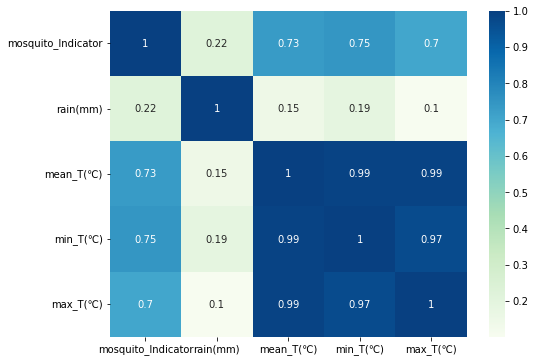

In [9]:
#Plotting Correlation map to identify attributes' relationships
corr=mosquito_data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap="GnBu")

**As expected. There is high multicollinearity between mean_T(℃) and [max_T(℃),min_T(℃)]**

In [10]:
mosquito_data.drop('mean_T(℃)', axis = 1, inplace = True) # removing it to avoid multicollinearity

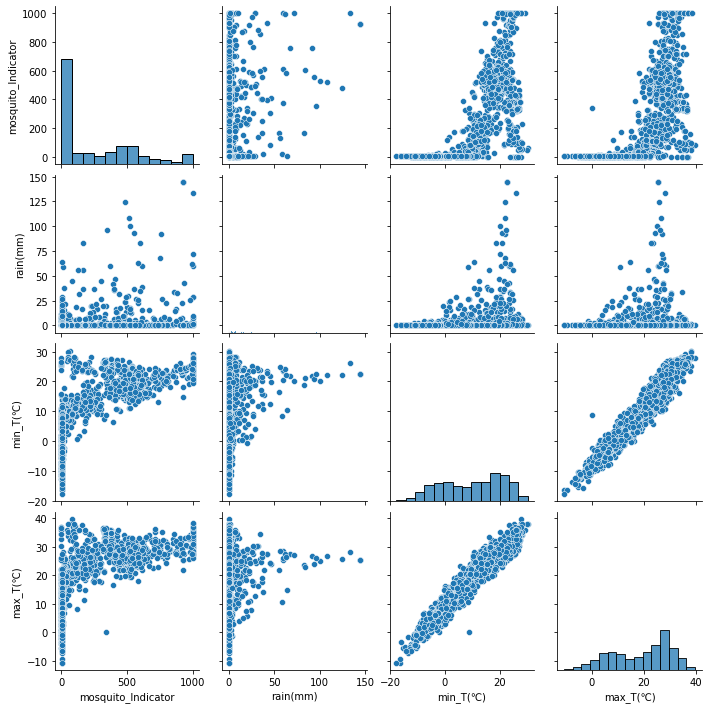

In [11]:
#Overview over data
sns.pairplot(mosquito_data)

In [12]:
# Checking for skewness
skew_vals = mosquito_data.iloc[:,1:4].skew()

skew_cols =  (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'}))

skew_cols

,Skew
rain(mm),6.610684
min_T(℃),-0.261844
max_T(℃),-0.417867


**Only rain(mm) skewness is alarming. We will use Polynomial transofrmation to mitigate the skewness effect**

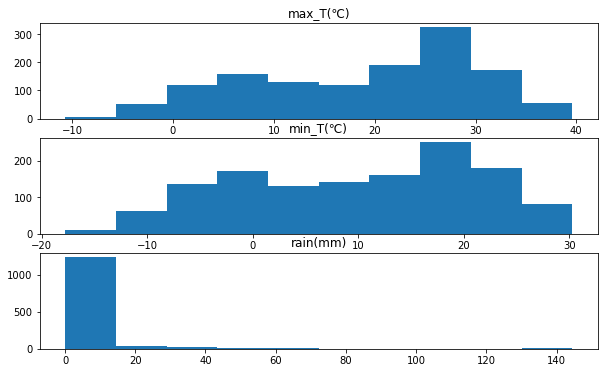

In [13]:
# Checking data skewness visually
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.hist(mosquito_data['max_T(℃)'])
plt.title('max_T(℃)')
plt.subplot(3,1,2)
plt.hist(mosquito_data['min_T(℃)'])
plt.title('min_T(℃)')
plt.subplot(3,1,3)
plt.hist(mosquito_data['rain(mm)'])
plt.title('rain(mm)')
plt.show()

## MACHINE LEARNING PART

In [14]:
# Import the necessary libraries for ML

from sklearn.model_selection import train_test_split # for splitting the data 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler # For feature transformation
from sklearn.model_selection import KFold # to find the best parameters
from sklearn.linear_model import LinearRegression, Lasso, Ridge # for regression
from sklearn.ensemble import GradientBoostingRegressor # for regression
from sklearn.metrics import r2_score, mean_squared_error # for evaluation
from sklearn.pipeline import Pipeline # for ML automation
from sklearn.model_selection import GridSearchCV # to find the best parameters

# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

### First: ML using train/test split and without hyperparameters tuning.

In [15]:
# Define a root mean sequare error function
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [16]:
# Create X & y
X = mosquito_data.drop('mosquito_Indicator', axis = 1) # prediction attributes
y = mosquito_data['mosquito_Indicator'] # Targer variable

In [17]:
pf = PolynomialFeatures(degree=3, include_bias=False) #Create a polynomial features instance with degree '3'
X_pf = pf.fit_transform(X) #Apply the transformation (we fit the x data frame into the pf instance)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=7218)

In [19]:
s = StandardScaler() #Creating a standardscaler instance
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test) # We apply standardscalar transformation also on the testing set, in order to let X_train and X_test have the same transformation

In [20]:
## Linear Regression
lr1 = LinearRegression()

In [21]:
lr1.fit(X_train_s, y_train) #We are fitting the standardscalar X_train data and the y_train
lr1_pred = lr1.predict(X_test_s)
print('r2 value is', r2_score(y_test,lr1_pred))
print('rmse value is', rmse(y_test,lr1_pred))

r2 value is 0.5931780749960296
rmse value is 189.4817793631367


In [22]:
## Lasso
lasso1 = Lasso()

In [23]:
# The lasso regression model
lasso1 = lasso1.fit(X_train_s, y_train)
lasso1_pred = lasso1.predict(X_test_s)
print('r2 value is', r2_score(y_test,lasso1_pred))
print('rmse value is', rmse(y_test,lasso1_pred))

r2 value is 0.6269526279495339
rmse value is 181.44594696447473


In [24]:
## Ridge
rr1 = Ridge()

In [25]:
# The ridge regression model
rr1 = rr1.fit(X_train_s, y_train)
rr1_pred = rr1.predict(X_test_s)
print('r2 value is', r2_score(y_test,rr1_pred))
print('rmse value is', rmse(y_test,rr1_pred))

r2 value is 0.631023739282156
rmse value is 180.45316009183475


In [26]:
## GBR
GBR = GradientBoostingRegressor(random_state=7218)

In [27]:
# The GBR model
GBR.fit(X_train_s, y_train)
GBR_pred = GBR.predict(X_test_s)
print('r2 value is', r2_score(y_test,GBR_pred))
print('rmse value is', rmse(y_test,GBR_pred))

r2 value is 0.6339314554076572
rmse value is 179.74072348021545


### Secondly, using GridSearch CV

**We are using GridSearch Cross Validation to find the most suitable parameters.**

We are also using pipelines, according to IBM, **"A pipeline contains a series of steps, where a step is ("name of step", actual_model). The "name of step" string is only used to help you identify which step you are on, and to allow you to specify parameters at that step."**

In [28]:
# initiate kf object >> 6 splits = 6 folds 
kf = KFold(shuffle=True, random_state=7218, n_splits=6)

In [29]:
#Regular Linear Regression
estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("linear_regression", LinearRegression())])

params = {
    'polynomial_features__degree': [1, 2, 3], # Two under scores (__) are used to specify the hyperparameters
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
print(grid.best_score_, grid.best_params_)

0.6167488712836326 {'polynomial_features__degree': 3}


In [30]:
best_LR_estimator = Pipeline([
            ("polynomial_features", PolynomialFeatures(3)),
            ("scaler", StandardScaler()),
            ("linear_regression", LinearRegression())])

best_LR_estimator.fit(X, y)
print('In-sample and out-sample combined score is', best_LR_estimator.score(X, y))

In-sample and out-sample combined score is 0.642504265518383


In [31]:
# Lasso
estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2, 3], # Two under scores (__) are used to specify the hyperparameters
    'lasso_regression__alpha': np.geomspace(0.01, 20, 30) #30 values here, 3 in the polynomial, implies 90 different output
}

grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
print(grid.best_score_, grid.best_params_)

0.6291164357029215 {'lasso_regression__alpha': 0.3018367159658668, 'polynomial_features__degree': 3}


In [32]:
best_lasso_estimator = Pipeline([
                    ("scaler", StandardScaler()),
                    ("make_higher_degree", PolynomialFeatures(degree=3)),
                    ("lasso_regression", Lasso(alpha=0.3))])

best_lasso_estimator.fit(X, y)
print('In-sample and out-sample combined score is', best_lasso_estimator.score(X, y))

In-sample and out-sample combined score is 0.639293812752828


In [33]:
# Ridge 
estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures()),
        ("scaler", StandardScaler()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3], # Two under scores (__) are used to specify the hyperparameters
    'ridge_regression__alpha': np.geomspace(0.1, 20, 30) #30 values here, 3 in the polynomial, implies 90 different output
}


grid = GridSearchCV(estimator, params, cv=kf)
grid.fit(X, y)
grid.best_score_, grid.best_params_


(0.6289107675018193,
 {'polynomial_features__degree': 3,
  'ridge_regression__alpha': 0.895674774455836})

In [34]:
#Create a pipeline named estimator
best_ridge_estimator = Pipeline([
        ("polynomial_features", PolynomialFeatures(3)),
        ("scaler", StandardScaler()),
        ("ridge_regression", Ridge(0.9))])

best_ridge_estimator.fit(X, y)
print('In-sample and out-sample combined score is', best_ridge_estimator.score(X, y))

In-sample and out-sample combined score is 0.6386584433208746


### Lastly, Cross Validation

In [35]:
# Regular Linear Regression 
linearRegression = LinearRegression().fit(X_train, y_train)
linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))
linearRegression_R2 = r2_score(y_test, linearRegression.predict(X_test)) 
print(linearRegression_rmse)
print(linearRegression_R2)

189.4817793631035
0.593178074996172


In [36]:
from sklearn.linear_model import LassoCV

alphas = np.geomspace(0.01, 20, 30)
lassoCV = LassoCV(alphas=alphas,
                  max_iter=100000,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))
lassoCV_R2 = r2_score(y_test, lassoCV.predict(X_test)) 

print('Lasso best alpha is ', lassoCV.alpha_)
print('Lasso rmse is ', lassoCV_rmse)  
print('Lasso R2 is ', lassoCV_R2)

Lasso best alpha is  4.150097237467682
Lasso rmse is  180.39235315159053
Lasso R2 is  0.6312723637702515


In [37]:
from sklearn.linear_model import RidgeCV

alphas = np.geomspace(0.001, 400, 50)
ridgeCV = RidgeCV(alphas=alphas, cv=3).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))
ridgeCV_R2 = r2_score(y_test, ridgeCV.predict(X_test)) 

print('Ridge best alpha is ', ridgeCV.alpha_)
print('Ridge rmse is ', ridgeCV_rmse)  
print('Ridge R2 is ', ridgeCV_R2)

Ridge best alpha is  181.58364372009143
Ridge rmse is  180.43950650162046
Ridge R2 is  0.6310795727191671


In [38]:
from sklearn.linear_model import ElasticNetCV
alphas = np.geomspace(0.01, 2, 100)
l1_ratios = np.linspace(0.1, 0.9, 10)

elasticNetCV = ElasticNetCV(alphas=alphas, 
                            l1_ratio=l1_ratios,
                            cv = 3,
                            max_iter=10000).fit(X_train, y_train)

elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))
elasticNetCV_R2 = r2_score(y_test, elasticNetCV.predict(X_test)) 

print('ElasticNet alpha is ',elasticNetCV.alpha_)
print('ElasticNet l1 ratio is ', elasticNetCV.l1_ratio_)
print('ElasticNet rmse is ', elasticNetCV_rmse)
print('ElasticNet R2 is ', elasticNetCV_R2)

ElasticNet alpha is  2.0
ElasticNet l1 ratio is  0.9
ElasticNet rmse is  180.72260208951894
ElasticNet R2 is  0.6299210495530996


In [39]:
rmse_vals = [linearRegression_rmse, lassoCV_rmse, ridgeCV_rmse, elasticNetCV_rmse]
R2_vals = [linearRegression_R2, lassoCV_R2, ridgeCV_R2, elasticNetCV_R2] 

labels = ['Linear Regression', 'Lasso', 'Ridge', 'ElasticNet']
metric_df = pd.Series(rmse_vals, index=labels).to_frame()
metric_df.rename(columns={0: 'RMSE'}, inplace=1)
metric_df['R2'] = R2_vals
metric_df

,RMSE,R2
Linear Regression,189.481779,0.593178
Lasso,180.392353,0.631272
Ridge,180.439507,0.631080
ElasticNet,180.722602,0.629921


## Recommended lgorithm:
**Since Lasso and Ridge regressions have the highest R^2 values, we recommend to use Ridge regression in the final prediction model. Because Ridge has less time complexity compared with Lasso, thus, it would be faster to use. However, The 3  attributes i.e., [Max_T, Min_T, rain(mm)], are not sufficient to gain +0.7 scores in R^2. Hence, additional data is required to obtain more accurate results.**

## Insights from the model

**1- Although wheather attributes are used to predict mosquitoes infestation. they are still insufficient to make acurate prediction.** <br>
**2 - Mosquitoes are more active in warmer temperatures wheathers.** <br>
**3 - There is no direct correlation between rain precipitation and mosquitoes infestation.**

## Future work

**Knowing what environmental circumstances that allow mosquitoes to breed/live can help us in preventing dengue disease borne. It is highly recommended to further investigate/identify what are the other causes of mosquitoes infestation to accurately predict their volumes.** 